## Dominik Szot, 27.04.2023
### Laboratorium 07
### Kwadratury adaptacyjne

Zadanie 1 - Obliczanie wartości całki

Import wymaganych bibilotek oraz definiowanie całek

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import scipy.integrate as integrate
import matplotlib.ticker

In [21]:
f1_x  = lambda x : np.double(4./(x**2 + 1))
f2_x  = lambda x : 0 if x == 0 else np.double(x ** 0.5 * np.log(x))

f3_helper = lambda x, a, b: 1/((x-a)**2 + b)
f3_x  = lambda x : np.double(f3_helper(x, 0.3, 0.001) + f3_helper(x, 0.9, 0.004) - 6)

In [22]:
f3_helper_ans = lambda x0, a : 1/np.power(a, 0.5) * (np.arctan((1-x0)/np.power(a, 0.5)) +np.arctan((x0)/np.power(a, 0.5)) )

f1_actual = np.pi 
f2_actual = -4/9
f3_actual = f3_helper_ans(0.3, 0.001) + f3_helper_ans(0.9, 0.004) - 6 

* W celu obliczenia wartości całki za pomocą kwadratur adaptacyjnych trapezów używam funkcji `scipy.integrate.quad_vec()` 
* Kwadratury adaptacyjne Gaussa-Kronroda nie działają

In [23]:
def evaluate_2(f_x, f_actual):
    m, a, b= 14, 0, 1
    # error_gauss = [np.double(0) for _ in range(m)]

    # for i in range(m+1):
    #     error = 10**(-i)
    #     y2, err2 = integrate.quadrature(f_x, a, b, tol=error)
    #     error_gauss[i-1] = np.abs((f_actual - y2)/np.pi)
        
    error_trapz = [np.double(0) for _ in range(m)]

    for i in range(m+1):
        error = 10**(-i)
        y1, err1 = integrate.quad_vec(f_x, a, b,limit=10**10, epsrel=error,epsabs=error, quadrature='trapezoid')
        error_trapz[i-1] = np.abs((f_actual - y1)/np.pi)
        
    plt.semilogy([i for i in range(m)], error_trapz, linewidth=1,  color="red", label="Błąd względny kwadratury adaptacyjnych trapezów")
    # plt.semilogy([i for i in range(m)], error_gauss, linewidth=1,  color="green", label="Błąd względny kwadratury trapezów")
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
    plt.title("Wykres wartości bezwzględnej błędu względnego w zależności od m")
    plt.xlabel("m")
    plt.ylabel("Błąd względny")
    plt.legend()
    plt.show()
    

In [4]:
def rectangular_method(nodes, values) -> None:
    accumulated = 0.

    for i in range(1, len(nodes)):
        accumulated += (nodes[i] - nodes[i-1])*values[i]
    
    return accumulated

In [5]:
def evaluate(f_x, f_actual):
    m = 26
    a = 0
    b = 1

    error_trapz = [np.double(0) for i in range(m-1)]
    error_simps = [np.double(0) for i in range(m-1)]
    error_rectangle = [np.double(0) for i in range(m-1)]

    for i in range(1, m):
        no_nodes = 2**i + 1
        quadrature_nodes = np.array([np.double(a) + np.double(i) * np.double((b-a))/(no_nodes-1) for i in range(no_nodes)])
        quadrature_points = [f_x(i) for i in quadrature_nodes]

        result_trapz = integrate.trapezoid(quadrature_points, quadrature_nodes, 1)
        result_simps = integrate.simpson(quadrature_points, quadrature_nodes, 1)
        result_rectangle = rectangular_method(quadrature_nodes, quadrature_points);

        error_trapz[i-1]=np.abs((( f_actual - result_trapz)/np.pi))
        error_simps[i-1]=np.abs((( f_actual - result_simps)/np.pi))
        error_rectangle[i-1]=np.abs((( f_actual - result_rectangle)/np.pi))

    x_no_points = [i for i in range(1, m)]

    plt.semilogy(x_no_points, error_trapz, linewidth=1,  color="red", label="Błąd względny kwadratury trapezów")
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())

    plt.semilogy(x_no_points, error_simps, linewidth=1,  color="green", label="Błąd względny kwadratury Simpsona")
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())

    plt.semilogy(x_no_points, error_rectangle, linewidth=1,  color="blue", label="Błąd względny kwadratury prostokątów")
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
    plt.grid(axis='x', color='0.95')


    plt.title("Wykres wartości bezwzględnej błędu względnego w zależności od m")
    plt.xlabel("m")
    plt.ylabel("Błąd względny")
    plt.legend()
    plt.show()

[0.013239352830248852, 0.0033155740256952146, 0.0008289295863128951, 0.00020723296117346922, 5.180824911615532e-05, 1.2952062416862866e-05, 3.238015606336086e-06, 8.095039015840215e-07, 2.023759753606659e-07, 5.0593993804826974e-08, 1.2648498415867247e-08, 3.1621244272693295e-09, 7.905312481753182e-10, 1.9763274136483664e-10, 4.940829135969854e-11, 1.235186080294587e-11, 3.0879652007364677e-12, 7.719559606876562e-13, 1.9366044060466746e-13, 4.8344431158245456e-14, 1.2722218725854067e-14, 3.1098756885421053e-15, 2.5444437451708133e-15, 2.6858017310136362e-15, 2.6858017310136362e-15]
[0.0026290232907892, 7.647757510904547e-06, 4.8106519024246646e-08, 7.527937548427748e-10, 1.1763811581839728e-11, 1.8376538159566985e-13, 2.8271597168564595e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4135798584282297e-16, 0.0, 0.0, 0.0, 1.4135798584282297e-16, 2.8271597168564594e-16, 1.4135798584282297e-16, 4.240739575284689e-16, 1.5549378442710527e-15, 2.1203697876423446e-15]
[0.1723942959221442, 0.082

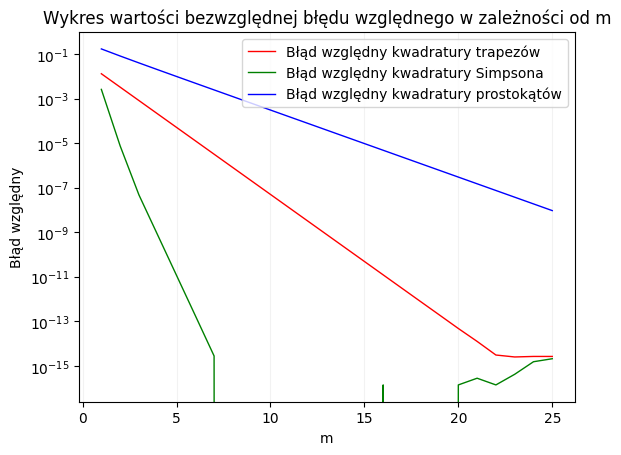

In [26]:
evaluate(f1_x, f1_actual)

[0.06346459600657738, 0.027482998323503847, 0.01157196649393427, 0.004765054305168214, 0.0019273531110916126, 0.0007683239202904937, 0.00030264570204667653, 0.00011803178319181167, 4.564772268350132e-05, 1.752818163692903e-05, 6.689415831664114e-06, 2.5393798595437398e-06, 9.595035565921862e-07, 3.610659432025167e-07, 1.353784708430803e-07, 5.0594851494406077e-08, 1.885391863763074e-08, 7.007443520792868e-09, 2.598287567410288e-09, 9.613404989180606e-10, 3.5498552466376085e-10, 1.3084522777518868e-10, 4.814852665961553e-11, 1.7690121450062468e-11, 6.490787645189593e-12]
[0.03746244116672679, 0.015489132429146003, 0.006268289217411095, 0.002496083575579552, 0.000981452713066073, 0.00038198085669013243, 0.00014741962929876694, 5.6493810240195943e-05, 2.1519702514058646e-05, 8.15500128806571e-06, 3.076493896569919e-06, 1.1560345355095046e-06, 4.328781222573319e-07, 1.6158673875107336e-07, 6.01493134193844e-08, 2.2333645056627838e-08, 8.273607691262212e-09, 3.0586185054065756e-09, 1.128568

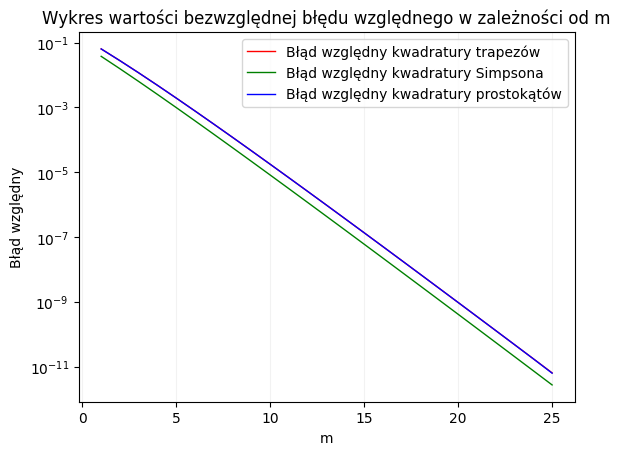

In [24]:
evaluate(f2_x, f2_actual)

[31.060539258940327, 10.578919161255481, 9.587172710784758, 0.5654218477964006, 0.11693023774165776, 0.007063796797283427, 0.00178252110422275, 0.0004457489439972278, 0.0001114446557782061, 2.786162761683891e-05, 6.965435876942506e-06, 1.741360792188212e-06, 4.3534031113344167e-07, 1.0883508230681597e-07, 2.720877510015954e-08, 6.8021915133121105e-09, 1.7005478783280276e-09, 4.2513244612646e-10, 1.06283111531615e-10, 2.657077788290375e-11, 6.676620387328215e-12, 1.673678552379024e-12, 3.980640881333895e-13, 1.4475057750305072e-13, 8.142219984546603e-14]
[31.715916337069643, 3.7517124620272, 9.256590560627856, 3.949620033990117, 0.34438093292101357, 0.029558350184176192, 2.2095873199509e-05, 1.582239250693903e-07, 9.893041547823659e-09, 6.182297165155296e-10, 3.86393572822206e-11, 2.4245721731760995e-12, 1.537974885969914e-13, 9.04691109394067e-15, 0.0, 0.0, 0.0, 0.0, 9.04691109394067e-15, 0.0, 1.809382218788134e-14, 1.809382218788134e-14, 9.04691109394067e-15, 1.809382218788134e-14, 0.

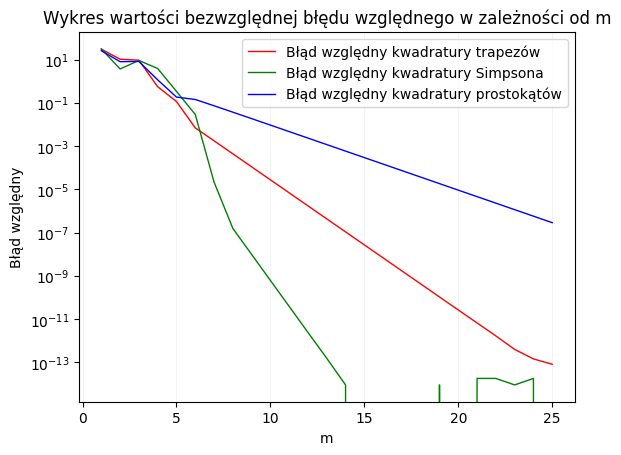

In [25]:
evaluate(f3_x, f3_actual)

In [10]:
# m, a, b= 14, 0, 1
# error_trapz = [np.double(0) for _ in range(m)]

# info = None

# for i in range(m+1):
#     error = 10**(-i)
#     y1, err1,info = integrate.quad_vec(f1_x, a, b,limit=10**10, epsrel=error,epsabs=error, quadrature='trapezoid', full_output=1)
#     error_trapz[i-1] = np.abs((np.pi - y1)/np.pi)


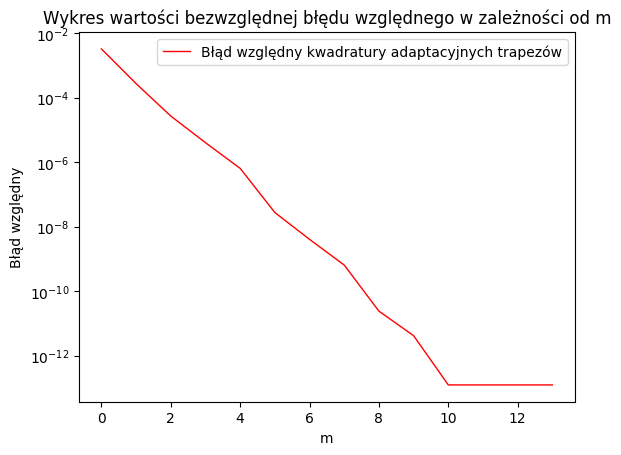

In [27]:
# plt.semilogy([i for i in range(m)], error_trapz, linewidth=1,  color="red", label="Błąd względny kwadratury trapezów")
# plt.semilogy([i for i in range(m)], error_gauss, linewidth=1,  color="green", label="Błąd względny kwadratury trapezów")
# plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())

evaluate_2(f1_x, f1_actual)

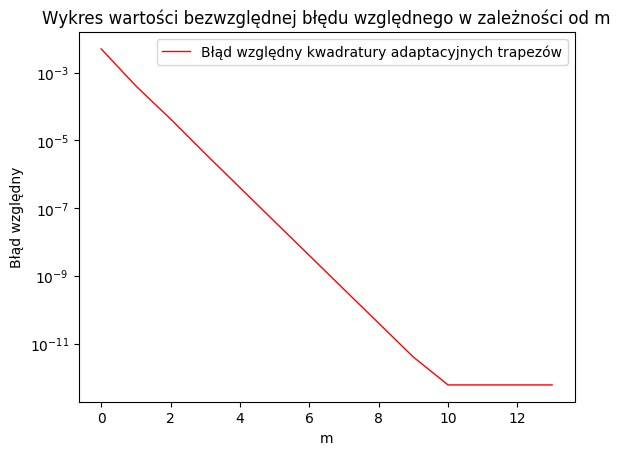

In [28]:
evaluate_2(f2_x, f2_actual)

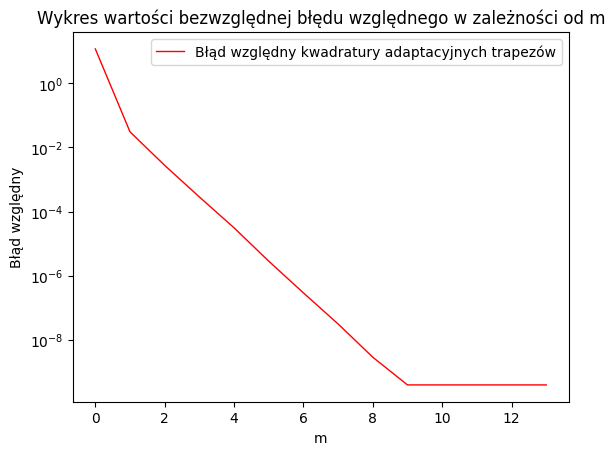

In [29]:
evaluate_2(f3_x, f3_actual)